In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn import metrics 
from pandas import DataFrame
%matplotlib inline

In [6]:
# Загружаем набор данных Ирисы:
iris = datasets.load_iris()
# Смотрим на названия переменных
print (iris.feature_names)
# Смотрим на данные, выводим 10 первых строк: 
print (iris.data[:10])
# Смотрим на целевую переменную:
print (iris.target_names)
print (iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [12]:
iris_frame_1 = iris_frame.drop(iris_frame[iris_frame.name == "setosa"].index)
iris_frame_1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


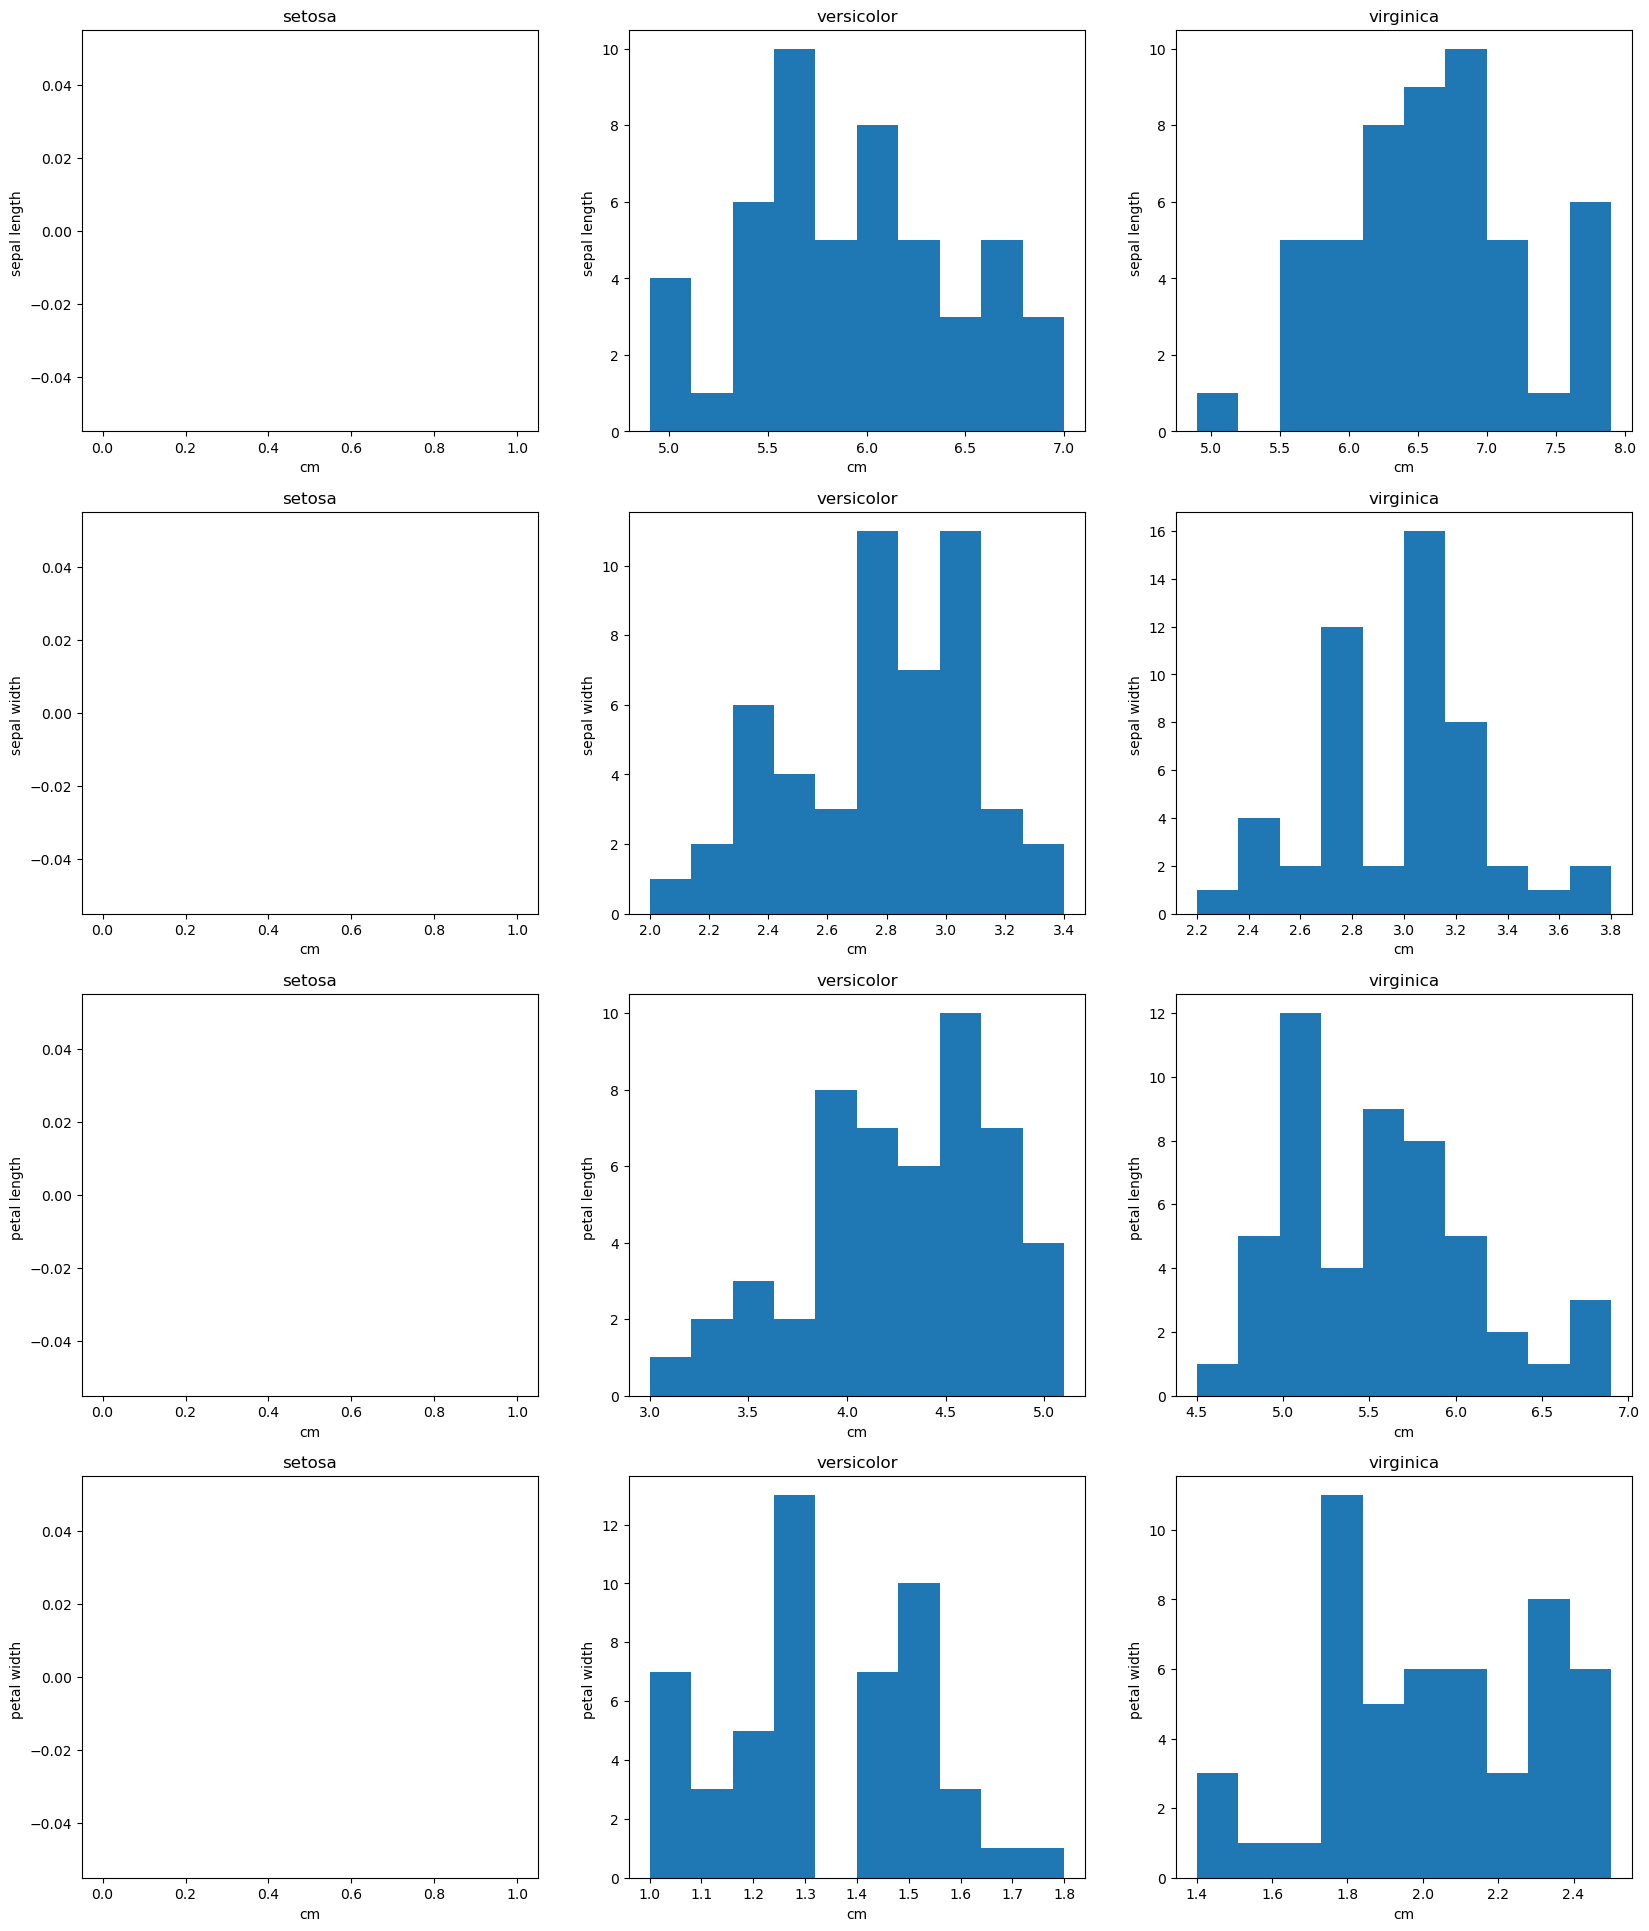

In [22]:
# Строим гистограммы по каждому признаку: 
pyplot.figure(figsize(20, 24))
plot_number = 0 

for feature_name in iris['feature_names']: 
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_frame_1[iris_frame_1.name == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

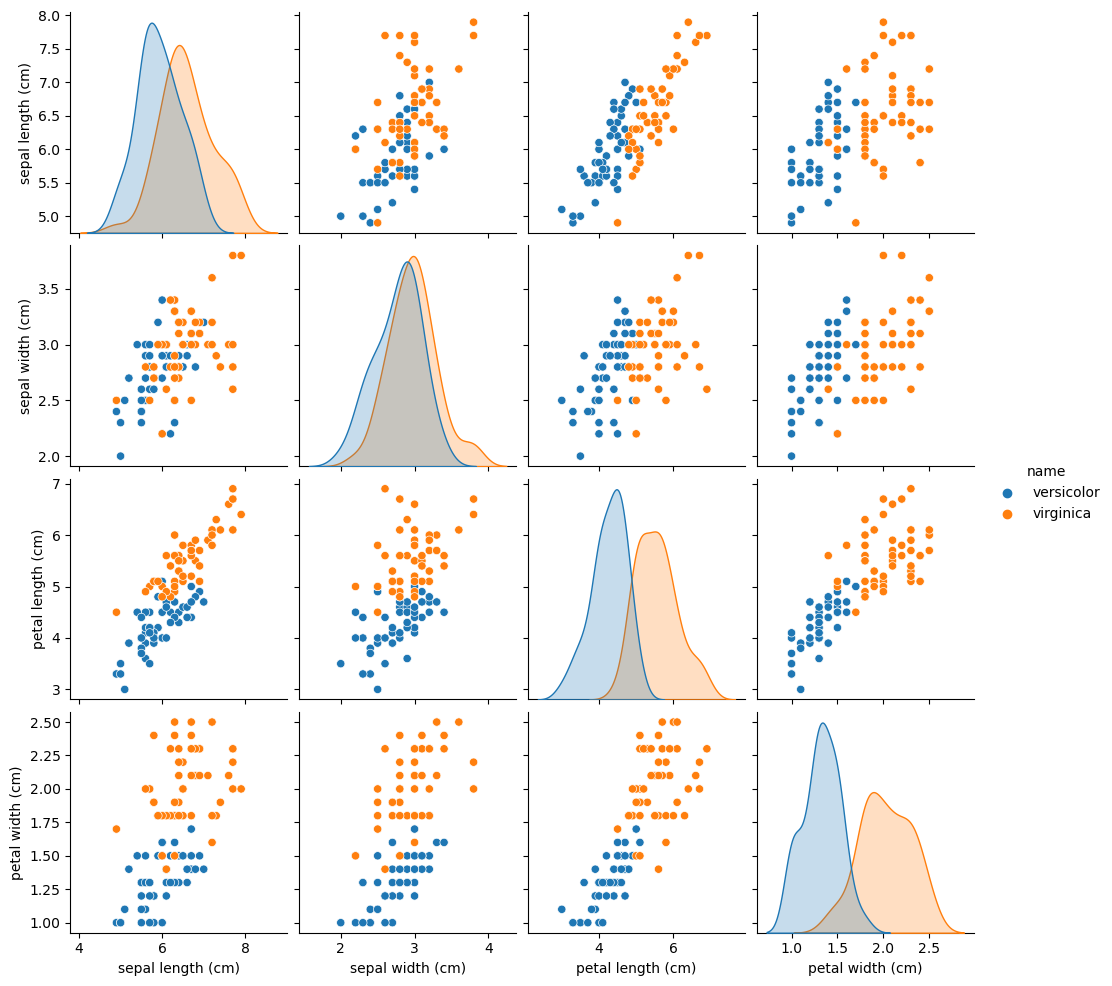

In [24]:
import seaborn as sns
sns.pairplot(iris_frame_1[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

In [25]:
iris_frame_1[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.553855,0.828479,0.593709
sepal width (cm),0.553855,1.000000,0.519802,0.566203
petal length (cm),0.828479,0.519802,1.000000,0.823348
petal width (cm),0.593709,0.566203,0.823348,1.000000


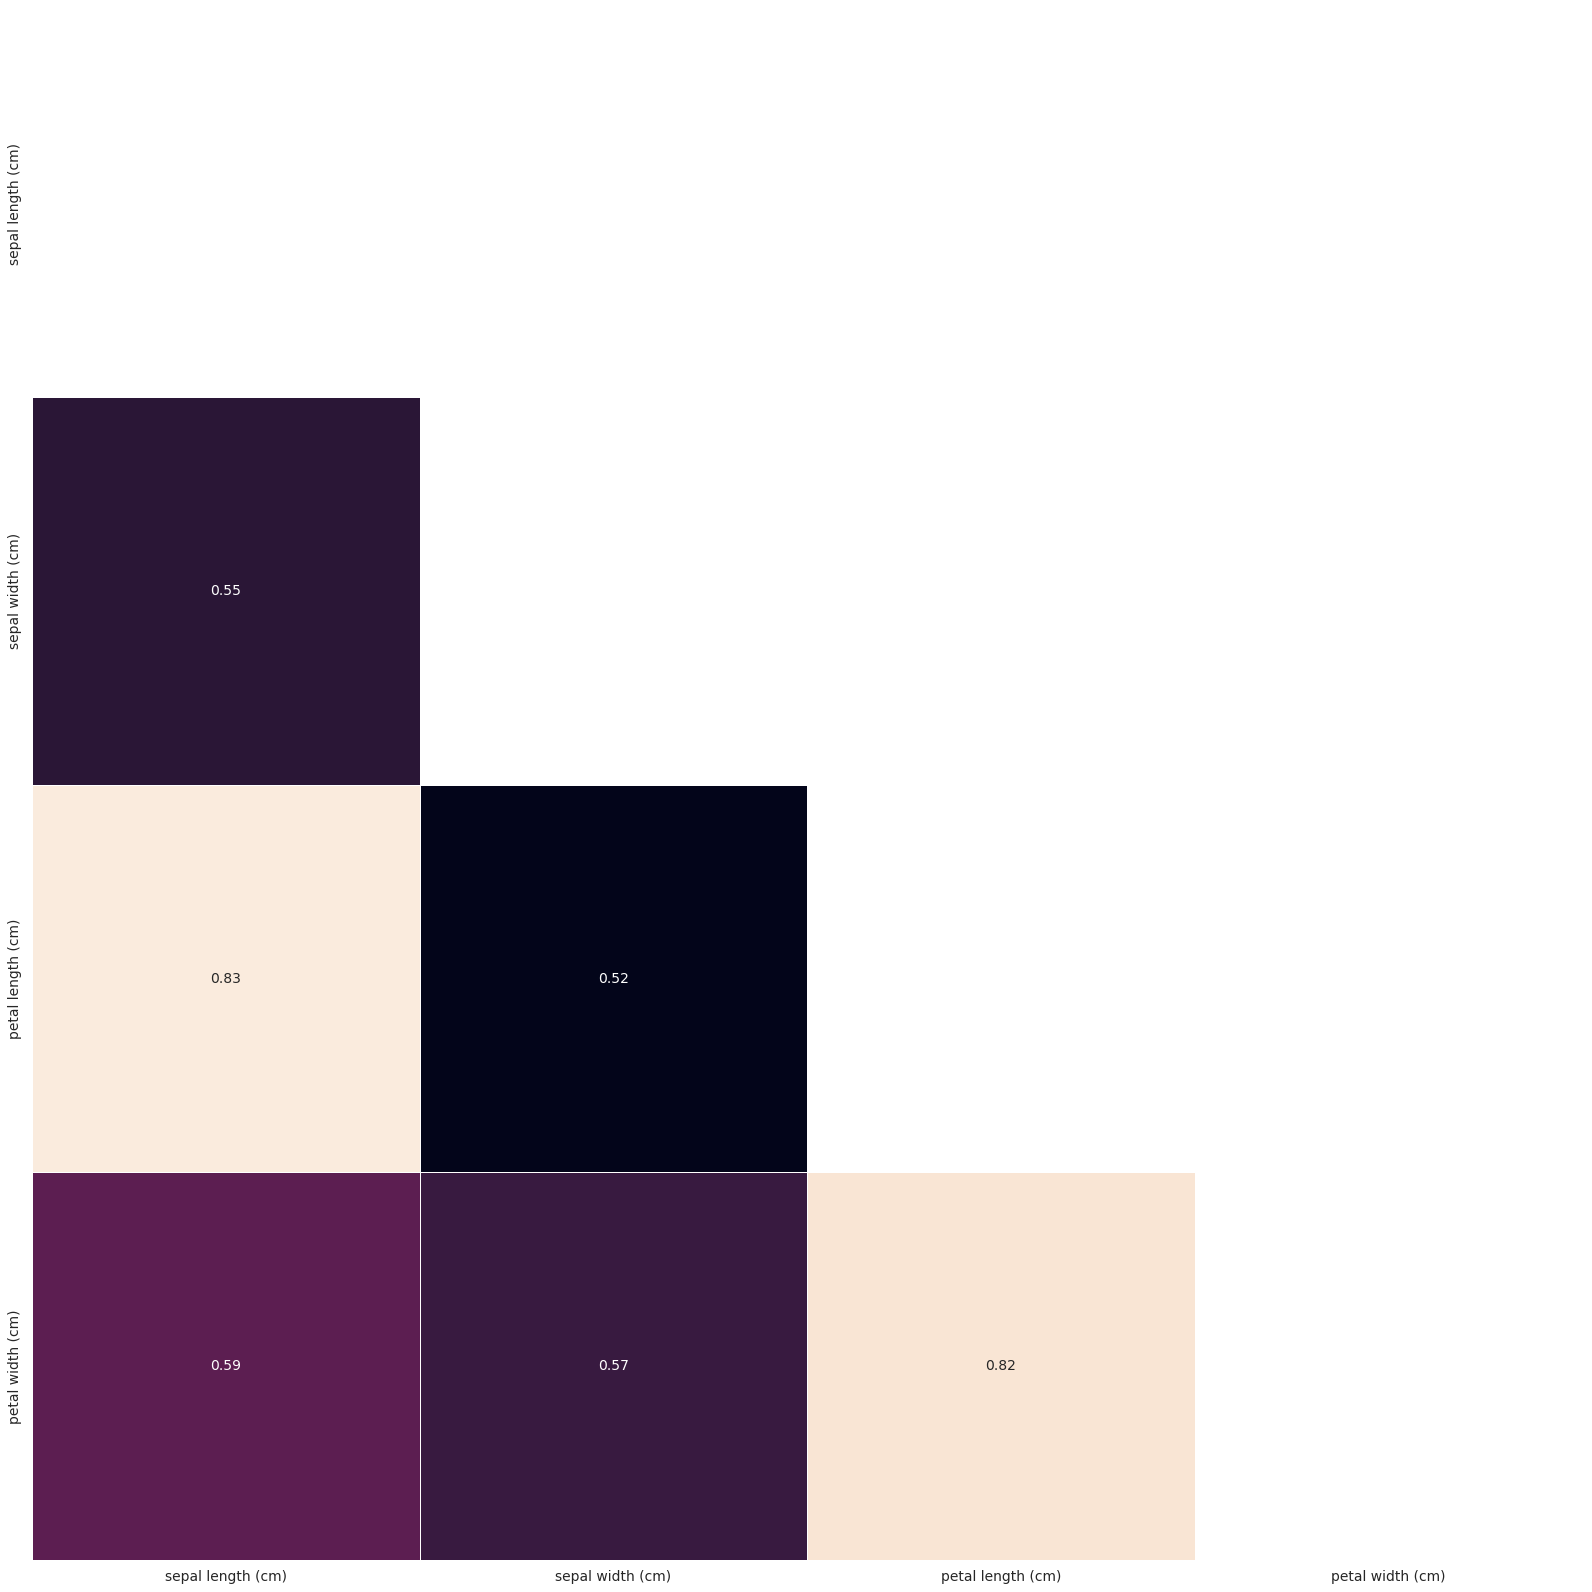

In [48]:
import seaborn as sns
corr = iris_frame_1[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True 
with sns.axes_style("white"): 
    ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)

In [83]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(iris_frame_1[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame_1['target'], test_size = 0.3, random_state = 0)

print (train_data)
print (test_data)
print (train_labels)
print (test_labels)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
110                6.5               3.2                5.1               2.0
130                7.4               2.8                6.1               1.9
140                6.7               3.1                5.6               2.4
118                7.7               2.6                6.9               2.3
101                5.8               2.7                5.1               1.9
..                 ...               ...                ...               ...
146                6.3               2.5                5.0               1.9
117                7.7               3.8                6.7               2.2
114                5.8               2.8                5.1               2.4
97                 6.2               2.9                4.3               1.3
94                 5.6               2.7                4.2               1.3

[70 rows x 4 columns]
     sepal length (cm)  sepal width (cm) 

In [84]:
#import required modules
import numpy as np

class LogisticRegression:
    def __init__(self,x,y):      
        self.intercept = np.ones((x.shape[0], 1))  
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
        
    #Sigmoid method
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))
    
    #method to calculate the Loss
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    #Method for calculating the gradients
    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]

    
    def fit(self, lr , iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
            
            loss = self.loss(sigma,self.y)

            dW = self.gradient_descent(self.x , sigma, self.y)
            
            #Updating the weights
            self.weight -= lr * dW

        return print('fitted successfully to data')
    
    #Method to predict the class label.
    def predict(self, x_new , treshold):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= treshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] == True: 
                y_pred[i] = 1
            else:
                continue
                
        return y_pred

In [90]:
from sklearn.datasets import load_iris

#Loading the data
data = load_iris()

In [91]:
x = data.data
y = data.target

In [92]:
regressor = LogisticRegression(x,y)

In [95]:
regressor.fit(0.2 , 5000)

fitted successfully to data


C:\Temp\ipykernel_20064\3001046366.py:18: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
C:\Temp\ipykernel_20064\3001046366.py:18: RuntimeWarning: invalid value encountered in multiply
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


In [96]:
y_pred = regressor.predict(x,0.5)

print('accuracy -> {}'.format(sum(y_pred == y) / y.shape[0]))

accuracy -> 0.3333333333333333


In [ ]:
#переходим к градиентному спуску

In [97]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split

In [98]:
def gradient_descent(max_iterations,threshold,w_init,
                     obj_func,grad_func,extra_param = [],
                     learning_rate=0.05,momentum=0.8):
    
    w = w_init
    w_history = w
    f_history = obj_func(w,extra_param)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  ithreshold:
        delta_w = -learning_rate*grad_func(w,extra_param) + momentum*delta_w
        w = w+delta_w
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,extra_param)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history


In [101]:
# Objective function
def f(w,extra=[]):
    return np.sum(w*w)

# Function to compute the gradient
def grad(w,extra=[]):
    return 2*w

# Function to plot the objective function
# and learning history annotated by arrows
# to show how learning proceeded
def visualize_learning(w_history):  
    
    # Make the function plot
    function_plot(pts,f_vals)
    
    # Plot the history
    plt.plot(w_history[:,0],w_history[:,1],marker='o',c='magenta') 
    
    # Annotate the point found at last iteration
    annotate_pt('minimum found',
                (w_history[-1,0],w_history[-1,1]),
                (-1,7),'green')
    iter = w_history.shape[0]
    for w,i in zip(w_history,range(iter-1)):
        # Annotate with arrows to show history
        plt.annotate("",
                    xy=w, xycoords='data',
                    xytext=w_history[i+1,:], textcoords='data',
                    arrowprops=dict(arrowstyle='<-',
                            connectionstyle='angle3'))     
    
def solve_fw():
    # Setting up
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-10,10,2)
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
    learning_rates = [0.05,0.2,0.5,0.8]
    momentum = [0,0.5,0.9]
    ind = 1
    
    # Iteration through all possible parameter combinations
    for alpha in momentum:
        for eta,col in zip(learning_rates,[0,1,2,3]):
            plt.subplot(3,4,ind)        
            w_history,f_history = gradient_descent(5,-1,w_init, f,grad,[],eta,alpha)
            
            visualize_learning(w_history)
            ind = ind+1
            plt.text(-9, 12,'Learning Rate = '+str(eta),fontsize=13)
            if col==1:
                plt.text(10,15,'momentum = ' + str(alpha),fontsize=20)

    fig.subplots_adjust(hspace=0.5, wspace=.3)
    plt.show()

In [103]:
# Input argument is weight and a tuple (train_data, target)
def grad_mse(w,xy):
    (x,y) = xy
    (rows,cols) = x.shape
    
    # Compute the output
    o = np.sum(x*w,axis=1)
    diff = y-o
    diff = diff.reshape((rows,1))    
    diff = np.tile(diff, (1, cols))
    grad = diff*x
    grad = -np.sum(grad,axis=0)
    return grad

# Input argument is weight and a tuple (train_data, target)
def mse(w,xy):
    (x,y) = xy
    
    # Compute output
    # keep in mind that wer're using mse and not mse/m
    # because it would be relevant to the end result
    o = np.sum(x*w,axis=1)
    mse = np.sum((y-o)*(y-o))
    mse = mse/2
    return mse    

In [116]:
# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(
                        iris_frame_1[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame_1['target'], test_size = 0.2, random_state = 0)

# Add a column of ones to account for bias in train and test
x_train = np.hstack((np.ones((y_train.size,1)),x_train))
x_test  = np.hstack((np.ones((y_test.size,1)),x_test))

# Initialize the weights and call gradient descent
rand = np.random.RandomState(19) 
w_init = rand.uniform(-1,1,x_train.shape[1])*.000001
w_history,mse_history = gradient_descent(100, 0.1, w_init, mse, grad_mse, (x_train,y_train), learning_rate=1e-6,momentum=0.7)

# Plot the MSE
plt.plot(np.arange(mse_history.size),mse_history)
plt.xlabel('Iteration No.')
plt.ylabel('Mean Square Error')
plt.title('Gradient Descent on Digits Data (Batch Version)')
plt.show()

NameError: name 'ithreshold' is not defined